# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/carmengg/eds-220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

In [ ]:
### ===== FINAL CODE =====

## Import libraries and functions

In [59]:
# import libraries and functions 
import os
import numpy as np 
import geopandas as gpd
import xarray as xr 
import rioxarray as rioxr 
from shapely import Point
from shapely.geometry import box
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [7]:
print(rioxr.__version__)

0.15.0


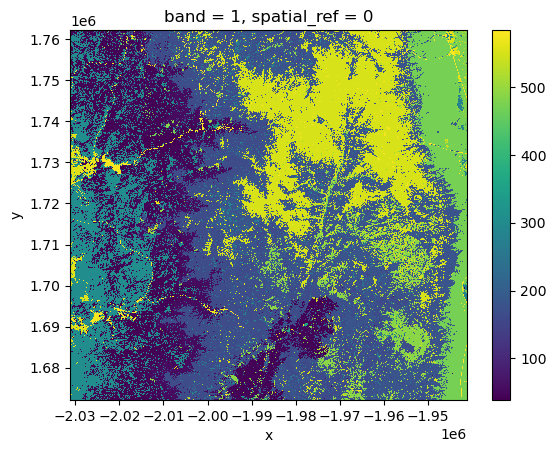

In [13]:
data_path = os.path.join(os.getcwd(), 'data', 'land_cover.tif')
lulc = rioxr.open_rasterio(data_path)
lulc.plot()

In [80]:
lulc.x.max().item()

-13129458.752008721

<AxesSubplot:>

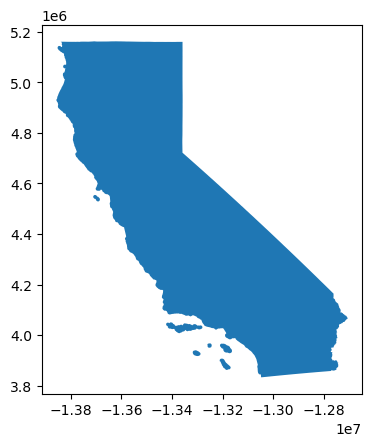

In [47]:
# 2
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')
ca.plot()

## Bounding box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

<AxesSubplot:>

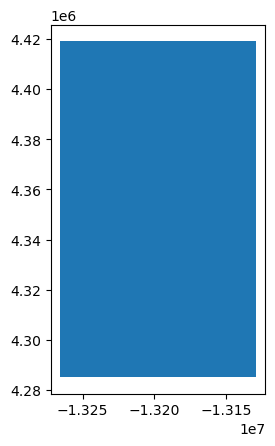

In [76]:
# Extract the bounding box coordinates
xmin, ymin, xmax, ymax = lulc.x.min().item(), lulc.y.min().item(), lulc.x.max().item(), lulc.y.max().item()

bbox_polygon = box(xmin, ymin, xmax, ymax)

bbox_gdf = gpd.GeoDataFrame({'geometry': [bbox_polygon]}, crs='EPSG:4326')

# Renaming the GeoDataFrame to 'bbox'
bbox = bbox_gdf

bbox.plot()

In [64]:
print(bbox.head())

                                            geometry
0  POLYGON ((-13129458.75201 4285068.69613, -1312...


## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

In [21]:
# Mount Whitney's coordinates (latitude and longitude)
mt_whitney_coords = (-118.291994, 36.578581)

# Create a Point geometry
mt_whitney_point = Point(mt_whitney_coords)

# Create a GeoDataFrame with the point
mt_whitney = gpd.GeoDataFrame([{'geometry': mt_whitney_point}], columns=['geometry'], crs="EPSG:4326")

mt_whitney.head()

,geometry
0,POINT (-118.29199 36.57858)


## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [65]:
# reproject data
ca = ca.to_crs(epsg=3857)
print(ca.crs)

lulc = lulc.rio.reproject('epsg:3857')
print(lulc.rio.crs)

mt_whitney = mt_whitney.to_crs(ca.crs)
print(mt_whitney.crs)

bbox = bbox.to_crs(ca.crs)
print(bbox.crs)

epsg:3857
EPSG:3857
epsg:3857
epsg:3857


## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

AttributeError: 'Patch' object has no property 'marker'

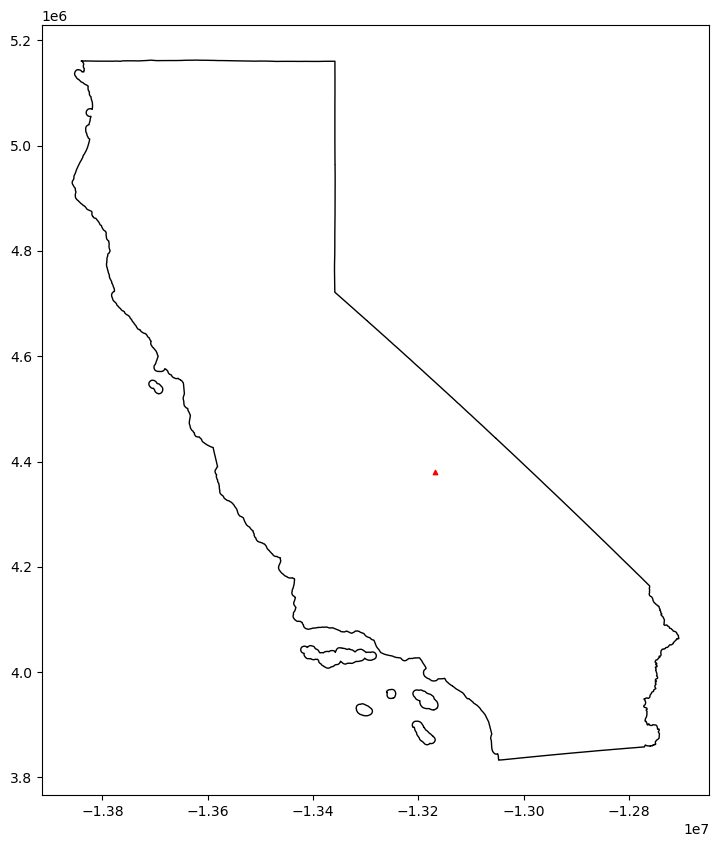

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotting California fire perimeters and bbox
ca.plot(ax=ax, color='none', edgecolor='black', linewidth=1)  # California fire perimeters
bbox.plot(ax=ax, color='none', edgecolor='blue', linestyle='--', linewidth=2)  # Bounding box

# Plotting Mount Whitney with a custom marker
mt_whitney.plot(ax=ax, color='red', marker='^', markersize=10, label='Mount Whitney')

# Customizing the legend
whitney_legend = mpatches.Patch(color='red', marker='^', markersize=10, label='Mount Whitney', linestyle='None')
ax.legend(handles=[whitney_legend])

# Setting title and labels
ax.set_title("Map Showing Bounding Box, California Fire Perimeters, and Mount Whitney")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Adjust the aspect ratio
ax.set_aspect('equal', adjustable='datalim')

# Show the plot
plt.show()


### mpatches??

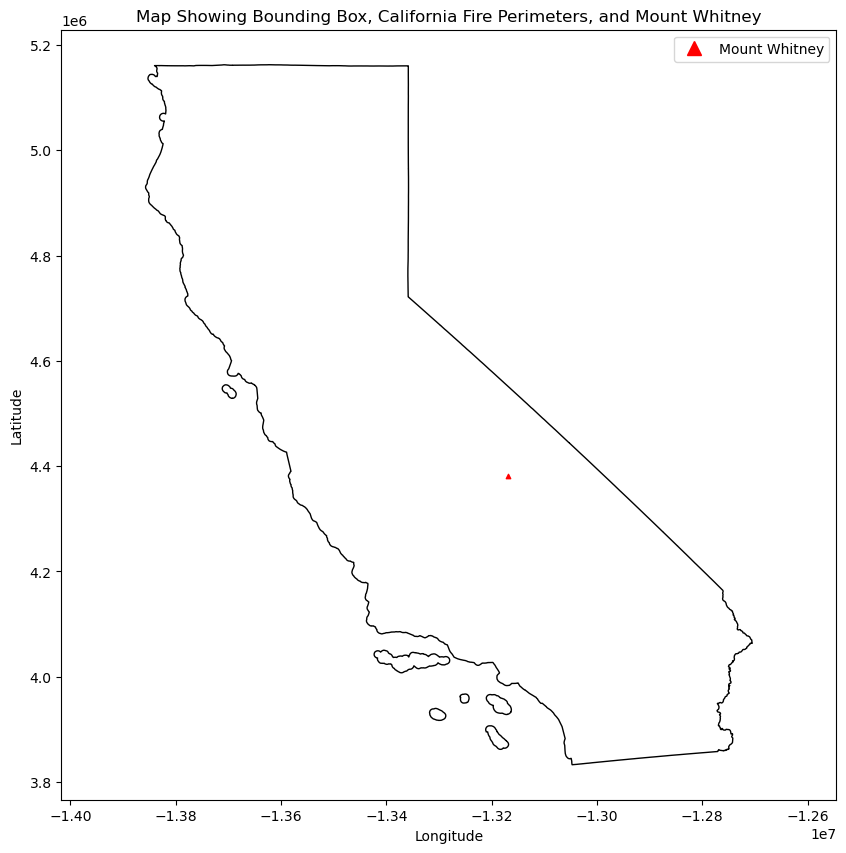

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotting California fire perimeters and bbox
ca.plot(ax=ax, color='none', edgecolor='black', linewidth=1)  # California fire perimeters
bbox.plot(ax=ax, color='none', edgecolor='blue', linestyle='--', linewidth=2)  # Bounding box

# Plotting Mount Whitney with a custom marker
mt_whitney.plot(ax=ax, color='red', marker='^', markersize=10, label='Mount Whitney')

# Customizing the legend
whitney_legend = Line2D([0], [0], color='red', marker='^', markersize=10, label='Mount Whitney', linestyle='None')
ax.legend(handles=[whitney_legend])

# Setting title and labels
ax.set_title("Map Showing Bounding Box, California Fire Perimeters, and Mount Whitney")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Adjust the aspect ratio
ax.set_aspect('equal', adjustable='datalim')

# Show the plot
plt.show()

## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
